<a href="https://colab.research.google.com/github/cendekialnazalia/Proyek_Analisis_Sentimen_PLN_Mobile/blob/main/Proyek_Analisis_Sentimen_PLN_Mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# 1. Mengambil semua ulasan dari aplikasi dengan ID 'com.icon.pln123' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat karena terdapat 10.000 jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.icon.pln123',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=10000             # Jumlah maksimum ulasan yang ingin diambil
)

In [ ]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,070b19f5-aa27-445d-8225-358e23de19e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi yang sangat bermanfaat, sangat Recomm...",5,55,5.2.71,2025-07-04 03:27:41,None,NaT,5.2.71
1,7129dc19-df9e-495b-b400-86ae3845e0dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi yang sangat user-friendly, informatif...",5,135,5.2.71,2025-06-24 01:20:21,"Wah, makasih banyak Kak Jimity. Ulasannya kere...",2025-07-07 07:14:23,5.2.71
2,b993af5d-2137-41ab-84a5-1df7e66ed807,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sya sudah lama pake aplikasi ini, bagus dan mu...",5,645,5.2.71,2025-06-24 07:13:35,"Malam Kak Endi. Fyi, demi menjaga keamanan dat...",2025-07-07 13:39:22,5.2.71
3,b2419b61-9c0b-4dfd-b580-27cd25f28ccd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"awalnya aman2 ajja, suka banget, Gerak Cepat k...",2,72,5.2.71,2025-06-22 18:09:24,Maaf ya Kak Mega ats kendalannya setelah updat...,2025-06-23 03:00:34,5.2.71
4,1b6e106e-87f4-4dfa-aa6e-caf1f93f2f53,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi yang sangat user- friendly, Informati...",5,89,5.2.71,2025-06-28 06:53:30,"Hai Kak Rizki. Makasih yah buat bintangnya, se...",2025-04-14 10:50:06,5.2.71


In [ ]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126000 entries, 0 to 125999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              126000 non-null  object        
 1   userName              126000 non-null  object        
 2   userImage             126000 non-null  object        
 3   content               126000 non-null  object        
 4   score                 126000 non-null  int64         
 5   thumbsUpCount         126000 non-null  int64         
 6   reviewCreatedVersion  112336 non-null  object        
 7   at                    126000 non-null  datetime64[ns]
 8   replyContent          118793 non-null  object        
 9   repliedAt             118793 non-null  datetime64[ns]
 10  appVersion            112336 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.6+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100602 entries, 1 to 125999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100602 non-null  object        
 1   userName              100602 non-null  object        
 2   userImage             100602 non-null  object        
 3   content               100602 non-null  object        
 4   score                 100602 non-null  int64         
 5   thumbsUpCount         100602 non-null  int64         
 6   reviewCreatedVersion  100602 non-null  object        
 7   at                    100602 non-null  datetime64[ns]
 8   replyContent          100602 non-null  object        
 9   repliedAt             100602 non-null  datetime64[ns]
 10  appVersion            100602 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.2+ MB


In [ ]:
# 2. Melakukan tahapan ekstraksi fitur dan pelabelan data

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy",])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text, threshold=0.5):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > threshold):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < -threshold):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    56969
negative    33033
neutral     10600
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=3,
    max_df=0.85,
    ngram_range=(1, 2),  # menambahkan bigram
    sublinear_tf=True,
    smooth_idf=True
)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Naive Bayes - accuracy_train: 0.7755495085796648
Naive Bayes - accuracy_test: 0.7761542666865464


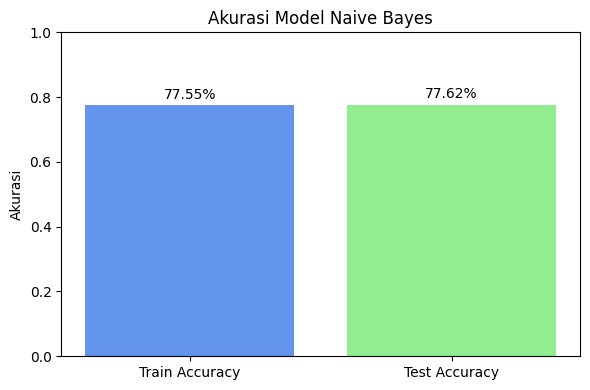

In [ ]:
# Naive Bayes
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

# Data akurasi
akurasi_label = ['Train Accuracy', 'Test Accuracy']
akurasi_nilai = [accuracy_train_nb, accuracy_test_nb]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(akurasi_label, akurasi_nilai, color=['cornflowerblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Akurasi Model Naive Bayes')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, nilai in enumerate(akurasi_nilai):
    persen = nilai * 100
    plt.text(i, nilai + 0.02, f"{persen:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Random Forest - accuracy_train: 0.9948310781426672
Random Forest - accuracy_test: 0.8708811689279857


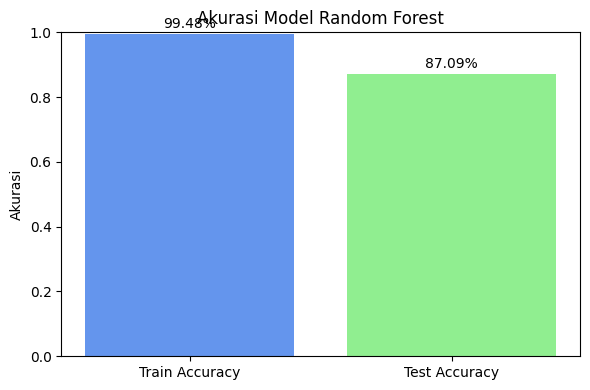

In [ ]:
# Random Forest
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

# Data akurasi
akurasi_label = ['Train Accuracy', 'Test Accuracy']
akurasi_nilai = [accuracy_train_rf, accuracy_test_rf]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(akurasi_label, akurasi_nilai, color=['cornflowerblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Akurasi Model Random Forest')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, nilai in enumerate(akurasi_nilai):
    persen = nilai * 100
    plt.text(i, nilai + 0.02, f"{persen:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Logistic Regression - accuracy_train: 0.9237335520184888
Logistic Regression - accuracy_test: 0.9202822921325978


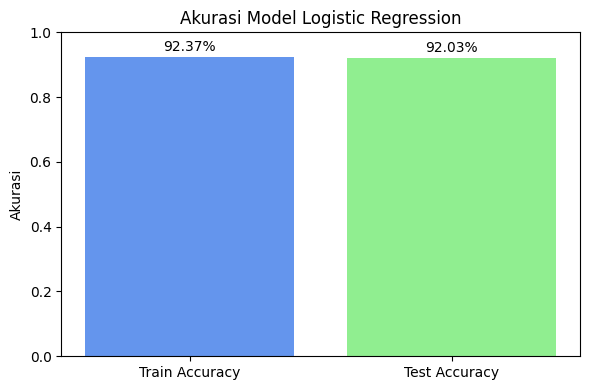

In [ ]:
# Logistic Regression
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

# Data akurasi
akurasi_label = ['Train Accuracy', 'Test Accuracy']
akurasi_nilai = [accuracy_train_lr, accuracy_test_lr]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(akurasi_label, akurasi_nilai, color=['cornflowerblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Akurasi Model Logistic Regression')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, nilai in enumerate(akurasi_nilai):
    persen = nilai * 100
    plt.text(i, nilai + 0.02, f"{persen:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Decision Tree - accuracy_train: 0.9948310781426672
Decision Tree - accuracy_test: 0.8226728293822375


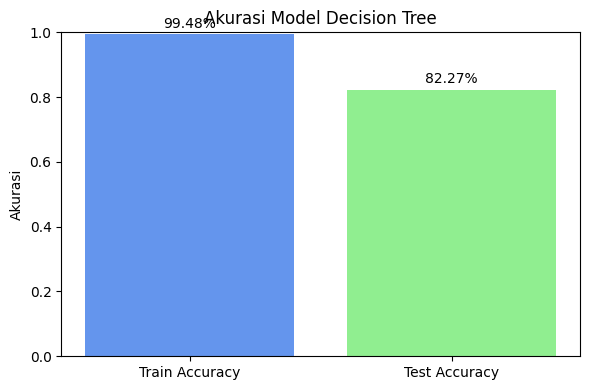

In [ ]:
# Decision Tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

# Data akurasi
akurasi_label = ['Train Accuracy', 'Test Accuracy']
akurasi_nilai = [accuracy_train_dt, accuracy_test_dt]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(akurasi_label, akurasi_nilai, color=['cornflowerblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Akurasi Model Decision Tree')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, nilai in enumerate(akurasi_nilai):
    persen = nilai * 100
    plt.text(i, nilai + 0.02, f"{persen:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Multinominal Naive Bayes - accuracy_train: 0.7674233670058772
Multinominal Naive Bayes - accuracy_test: 0.7683514735848119


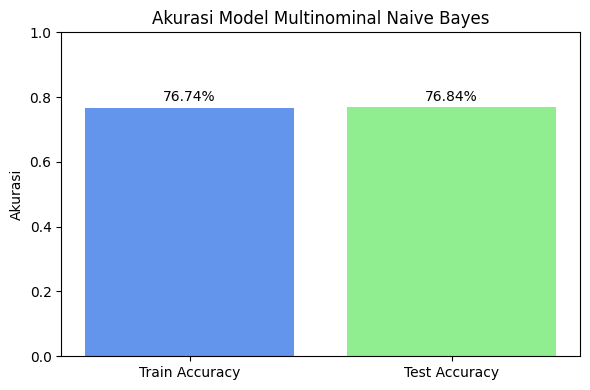

In [ ]:
# Multinominal Naive Bayes
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

# Membuat objek model Multinominal Naive Bayes
naive_bayes = model

# Melatih model Multinominal Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_mnb = naive_bayes.predict(X_train.toarray())
y_pred_test_mnb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Multinominal Naive Bayes
accuracy_train_mnb = accuracy_score(y_pred_train_mnb, y_train)
accuracy_test_mnb = accuracy_score(y_pred_test_mnb, y_test)

# Menampilkan akurasi
print('Multinominal Naive Bayes - accuracy_train:', accuracy_train_mnb)
print('Multinominal Naive Bayes - accuracy_test:', accuracy_test_mnb)

# Data akurasi
akurasi_label = ['Train Accuracy', 'Test Accuracy']
akurasi_nilai = [accuracy_train_mnb, accuracy_test_mnb]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(akurasi_label, akurasi_nilai, color=['cornflowerblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Akurasi Model Multinominal Naive Bayes')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, nilai in enumerate(akurasi_nilai):
    persen = nilai * 100
    plt.text(i, nilai + 0.02, f"{persen:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

SVM (Linear) - accuracy_train: 0.9230625862004697
SVM (Linear) - accuracy_test: 0.9197852989414045


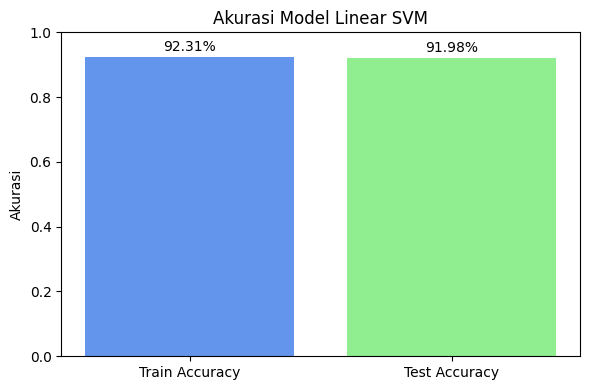

In [ ]:
# SVM (Linear)
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
model = LinearSVC()

# Membuat objek model Decision Tree
svm = model

# Melatih model Decision Tree pada data pelatihan
svm.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm.predict(X_train.toarray())
y_pred_test_svm = svm.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM (Linear) - accuracy_train:', accuracy_train_svm)
print('SVM (Linear) - accuracy_test:', accuracy_test_svm)


# Data akurasi
akurasi_label = ['Train Accuracy', 'Test Accuracy']
akurasi_nilai = [accuracy_train_svm, accuracy_test_svm]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(akurasi_label, akurasi_nilai, color=['cornflowerblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Akurasi Model Linear SVM')
plt.ylabel('Akurasi')

# Menampilkan nilai akurasi di atas bar
for i, nilai in enumerate(akurasi_nilai):
    persen = nilai * 100
    plt.text(i, nilai + 0.02, f"{persen:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.8.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.7.7.0.39.39
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.6.15
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy